In [1]:
# Step 1: Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist



In [3]:
# Step 2: Load Dataset


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


In [5]:
# Step 3: Preprocessing

In [6]:

X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [7]:
# Logistic Regression (Traditional ML)

In [8]:
# Flatten Images

In [9]:
X_train_flat = X_train_norm.reshape(-1, 28*28)
X_test_flat = X_test_norm.reshape(-1, 28*28)

print(X_train_flat.shape)



(60000, 784)


In [10]:
# Train Model


In [11]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_flat, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [12]:
# Predict & Evaluate

In [13]:
y_pred_lr = lr_model.predict(X_test_flat)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9259


In [14]:
# Confusion Matrix

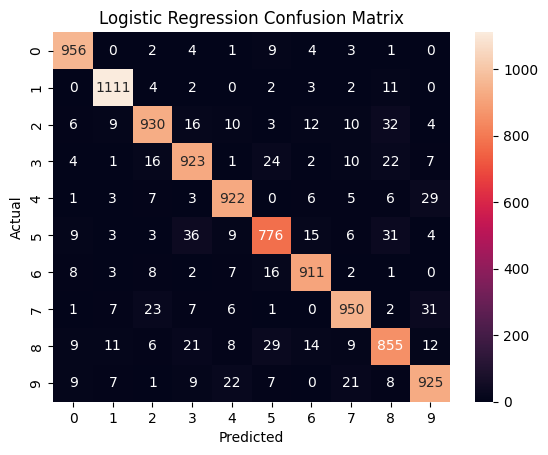

In [15]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure()
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
# CNN Model (Deep Learning)

In [17]:
# Reshape for CNN

In [18]:
X_train_cnn = X_train_norm.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_norm.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [19]:
# Build CNN Model

In [20]:

cnn_model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [21]:
# Train Model

In [22]:
history = cnn_model.fit(
    X_train_cnn, y_train_cat,
    epochs=5,
    validation_split=0.2,
    batch_size=64
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.9392 - loss: 0.2006 - val_accuracy: 0.9755 - val_loss: 0.0822
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.9822 - loss: 0.0573 - val_accuracy: 0.9836 - val_loss: 0.0590
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9870 - loss: 0.0412 - val_accuracy: 0.9868 - val_loss: 0.0473
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9901 - loss: 0.0309 - val_accuracy: 0.9840 - val_loss: 0.0521
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9921 - loss: 0.0245 - val_accuracy: 0.9890 - val_loss: 0.0368


In [23]:
# Evaluate CNN

In [24]:
test_loss, test_acc = cnn_model.evaluate(X_test_cnn, y_test_cat)

print("CNN Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9885 - loss: 0.0344
CNN Accuracy: 0.9884999990463257


In [25]:
# CNN Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


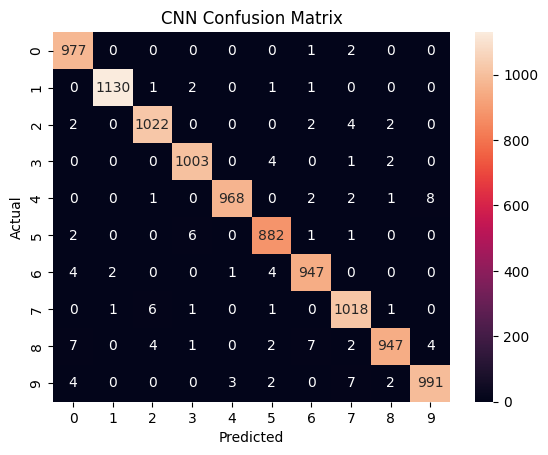

In [26]:
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

cm_cnn = confusion_matrix(y_test, y_pred_cnn)

plt.figure()
sns.heatmap(cm_cnn, annot=True, fmt='d')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
# Training vs Validation Accuracy Graph

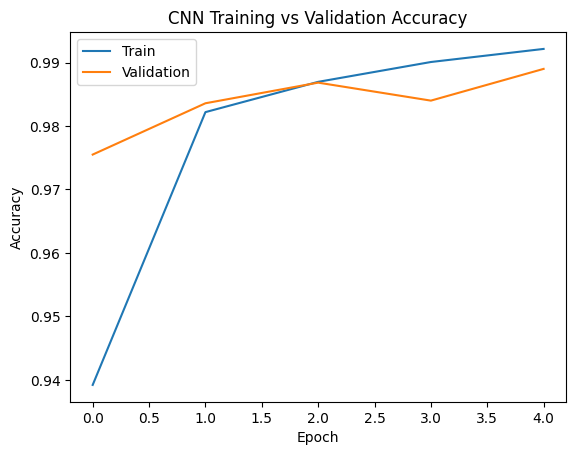

In [28]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("CNN Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'])
plt.show()

In [29]:
# Final Comparison

In [30]:
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

print("CNN Accuracy:", test_acc)

Logistic Regression Accuracy: 0.9259
CNN Accuracy: 0.9884999990463257
